# Transaction Analysis
Fraud analysis is crucial due to the rising incidence of fraud in transactions, aiming to detect patterns and anomalies. It helps mitigate risks, ensuring financial security and compliance with regulations. Enhancing customer trust is vital by demonstrating a commitment to secure transactions. Operational efficiency improves through streamlined processes and resource optimization. The financial industry faces challenges with the increasing complexity of digital transactions. Data-driven insights enable informed decisions for continuous improvement in fraud prevention. Adaptation to evolving threats is essential to stay ahead in the dynamic landscape of financial transactions.

## Dictionary
* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* **amount** - amount of the transaction in local currency.

* **nameOrig** - customer who started the transaction

* **oldbalanceOrg** - initial balance before the transaction

* **newbalanceOrig** - new balance after the transaction

* **nameDest** - customer who is the recipient of the transaction

* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Procedure 
## How we proceed the Transaction Fraud analysis.
### Data Exploration

**Step 1: Uniques & NAs**

**Objective:** To know if there is any duplicate data and if at all there are any missing values.

* Unique Values:

 1.Pick out how many different values each column has.
 

* Null Values:

 1.Check whether the fields have missing data in them or not.

 2.Find out if the missing data is important in our analysis.

**Step 2: Distribution Among Classes**

**Objective:** Check percentage split between normal and fraud transactions.

* Class Distribution:

 1.Number of classes represented by transactions needs to be counted.

 2.Make a bar graph that simply shows how different normal transactions are from fraud cases graphically represented by a bar    chart.

**Step 3: Amount Transfer Per Class**

**Objective: How much money is involved in various types of transactions?**

* Amount Distribution:

 1.Adding up the amounts for each group is essential.

 2.Show on a bar chart what would be the financial impact of fraud versus normal transactions.

**Step 4: Distribution Among Classes for Flagged Fraud**

**Objective:** Transactions identified as frauds through flagging

* Flagged Fraud Distribution:

 1.Find out how many among the given number of cases were flagged as fraud by an existing system.

 2.Revisit class distribution methodology while considering flagged fraud.
 
**Step 5: Amount Transfer Per Class for Flagged Fraud**
**Objective:** Understand the money involved in transactions flagged as fraud.

* Flagged Fraud Amount Distribution:
 1.Sum up the amounts for transactions flagged as fraud.
 2.Visualize with a bar chart to see the financial impact of flagged fraud transactions.

**Step 6: Cash Flows from Various Transactions**
**Objective:** Understand how money moves around in different types of transactions.

* Cash Flow Analysis:
 1.Look at the flow of money for each type of transaction.
 2.Identify patterns and anomalies in the movement of funds.

**Step 7: Major Types Involved in Fraud**
**Objective:** Identify the main types of transactions associated with fraud.

* Fraud Type Identification:
 1.Analyze which types of transactions are frequently associated with fraud.
 2.Identify patterns or common characteristics of fraudulent transactions.
 
**Step 8: Concise Data - Remove Unwanted Columns**
**Objective:** Streamline the dataset by removing unnecessary columns.

* Identify Unwanted Columns:

 1.Look for columns that do not contribute significantly to the analysis or contain redundant information.

**Step 9: Likelihood of Fraud - Recipient vs. Initiator**
**Objective:** Understand if the recipient or initiator of a transaction is more likely to engage in fraud.

* Fraud Likelihood Analysis:

 1.Consider creating a new feature indicating whether the recipient or initiator is involved in the fraud.
   Analyze the distribution of fraud cases based on this new feature.
* Visualize the Results:

 1.Use visualizations bar charts to compare the likelihood of fraud between recipients and initiators.
   This provides insight into which party is more frequently associated with fraudulent activities.
   
### Accuracy by existing Fraud detector

Evaluate the performance of the current fraud detector using custom accuracy functions and a confusion matrix. Identify True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Utilize custom functions for Accuracy, Precision, Recall, and F1 Score. Create a confusion matrix for visual representation. Apply the fraud detector to a test set and calculate accuracy metrics to gain insights into its effectiveness.

### Data Pre-Processing
Perform the nessesary processing on data to make data ready for ML Models.

### Generating Sample Data from the fraud data 
Generating sample data from fraud data is done to expedite the training of machine learning models and streamline the fine-tuning process.
By using a sample, machine learning models can be trained more efficiently and fine-tuned with less computational burden, while still capturing the essential characteristics of the data.

### ML Models
#### Train ML models for better Fraud detections.
##### Algorithm used :
**1. KNN**

**2. SVM**

**3. Logistic Regression**

**4. Random Forest Classification**

### Train the Best Performing Models on Entire Dataset.
##### Finally we Trained The best performing model on the entire dataset and obtain a better performing fraud detector than the exsisting one.



# DATA EXPLORATION

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
fraud_data = pd.read_csv("Fraud.csv")

In [3]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Step 1: Uniques & NAs**

In [4]:
fraud_data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [5]:
fraud_data.isnull().values.any()

False

In [6]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Step 2: Distribution Among Classes**

Number of normal Transactions : 6354407 | Number of Fraud Transactions : 8213


Text(0, 0.5, 'Frequency')

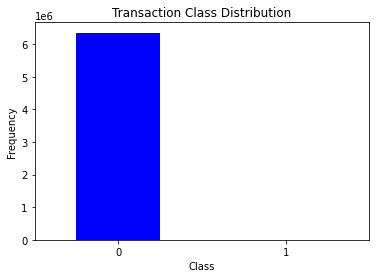

In [7]:
count_classes = pd.value_counts(fraud_data['isFraud'], sort = True)
print(f"Number of normal Transactions : {count_classes[0]} | Number of Fraud Transactions : {count_classes[1]}")
color = ['blue', 'red'] 
count_classes.plot(kind = 'bar', rot=0,color = color)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

* **Number of normal Transactions : 6354407 | Number of Fraud Transactions : 8213**

**Step 3: Amount Transfer Per Class**

In [8]:
## Get the Fraud and the normal dataset 

fraud = fraud_data[fraud_data['isFraud']==1]

normal = fraud_data[fraud_data['isFraud']==0]

In [9]:
print(fraud.shape,normal.shape)

(8213, 11) (6354407, 11)


In [10]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [11]:
normal.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

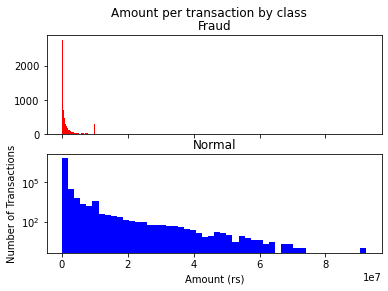

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins,color = "red")
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins , color = "blue")
ax2.set_title('Normal')
plt.xlabel('Amount (rs)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

**Step 4: Distribution Among Classes for Flagged Fraud**

Number of Flagged normal Transactions : 6362604 | Number of Flagged Fraud Transactions : 16


Text(0, 0.5, 'Frequency')

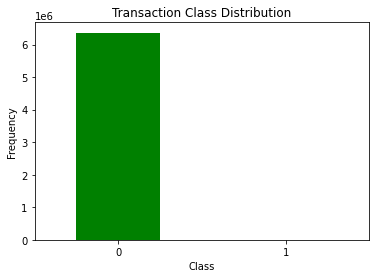

In [13]:
count_classes = pd.value_counts(fraud_data['isFlaggedFraud'], sort = True)
print(f"Number of Flagged normal Transactions : {count_classes[0]} | Number of Flagged Fraud Transactions : {count_classes[1]}")
color = ['green', 'red'] 
count_classes.plot(kind = 'bar', rot=0,color = color)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

* **Number of Flagged normal Transactions : 6362604 | Number of Flagged Fraud Transactions : 16** 

**Step 5: Amount Transfer Per Class for Flagged Fraud**

In [14]:
## Get the Flagged Fraud and the Flagged normal dataset 
flagged_fraud = fraud_data[fraud_data['isFlaggedFraud']==1]

flagged_normal = fraud_data[fraud_data['isFlaggedFraud']==0]

In [15]:
print(flagged_fraud.shape,flagged_normal.shape)

(16, 11) (6362604, 11)


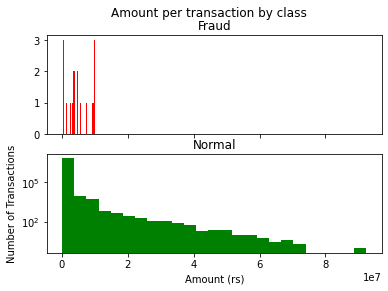

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(flagged_fraud.amount, bins = bins,color = "red")
ax1.set_title('Fraud')
ax2.hist(flagged_normal.amount, bins = bins , color = "green")
ax2.set_title('Normal')
plt.xlabel('Amount (rs)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [17]:
fraud_data[fraud_data["isFraud"] == 1].head(n = 10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


**Step 6: Concise Data - Remove Unwanted Columns**

In [18]:
drop_col = ["nameOrig","nameDest"]
fraud_data_new = fraud_data.drop(drop_col,axis = 1)
fraud_data_new.head(n=10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


**Step 7: Cash Flows from Various Transactions**

<AxesSubplot:xlabel='type', ylabel='amount'>

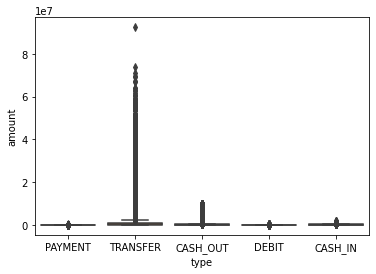

In [19]:
sns.boxplot(x = "type", y= "amount",data = fraud_data_new)


<AxesSubplot:xlabel='type', ylabel='amount'>

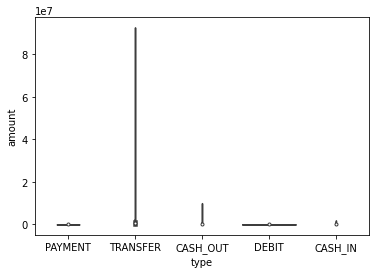

In [20]:
sns.violinplot(x = "type", y= "amount",data = fraud_data_new , heu = "isFraud")

<AxesSubplot:xlabel='type', ylabel='amount'>

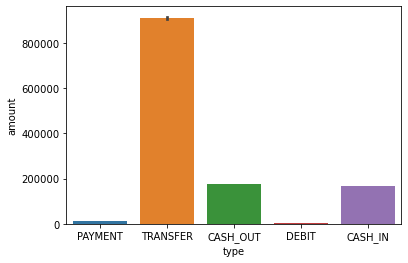

In [21]:
sns.barplot(x = "type", y= "amount",data = fraud_data_new)

In [22]:
types = list(fraud_data_new["type"].unique())
cash_flow = {}

for typ in types :
    df = fraud_data_new[fraud_data_new["type"] == typ]
    cash_flow[typ] = df["amount"].sum()
    
transaction_type = list(cash_flow.keys())
amount = list(cash_flow.values())

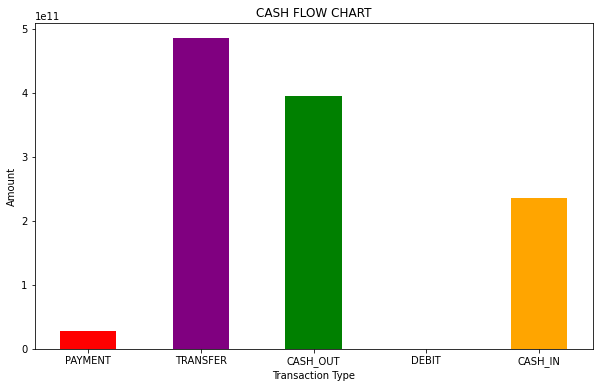

In [23]:
fig = plt.figure(figsize = (10,6))
plt.bar(transaction_type, amount, color =["red","purple","green","yellow","orange"], 
        width = 0.5)
 
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.title("CASH FLOW CHART")
plt.show()

* **It is clearly visible that larger sum of amount flow thre Transfer and Cash-outs Followed by Cash-ins ,Payments and least goes threw debit**

**Step 8: Major Types Involved in Fraud**

In [24]:
frauds = fraud_data_new[fraud_data["isFraud"] == 1]

In [25]:
frauds.shape

(8213, 9)

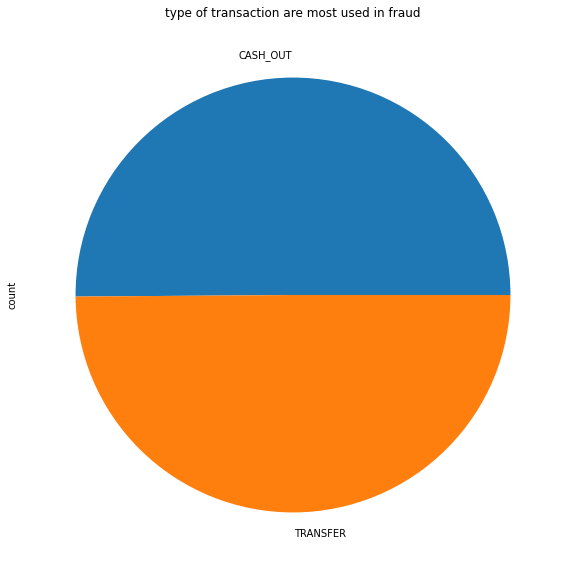

In [26]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
frauds["type"].value_counts().plot(ax=ax, kind='pie')
#ax.set_ylabel("")
ax.set_title("type of transaction are most used in fraud")
plt.show()

In [27]:
frauds["type"].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [28]:
a = list(frauds["type"].unique())

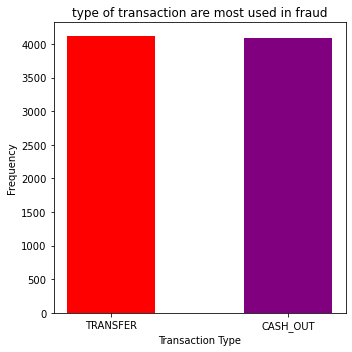

In [29]:
fig = plt.figure(figsize = (5,5))
plt.bar(a,list(frauds["type"].value_counts()), color =["red","purple"], 
        width = 0.5)
 
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.title("type of transaction are most used in fraud")
plt.tight_layout()
plt.show()

* **There are only To types of transaction which is being used for fraud transaction. Transfer :4116 ,Cash_out : 4097.**
* **Both the types are almost used in similar frequencies.**


#### Step 9: Likelihood of Fraud - Recipient vs. Initiator

##### We will use Two Formulas :
* **oldbalanceOrg - amount = newbalanceOrig**
* **oldbalanceDest + amount = newbalanceDest**
* **Both side are at fault use & Operation**

**Initiator is fraud**

In [30]:
costumer_who_started_transaction = frauds[((frauds["oldbalanceOrg"] - frauds["amount"]) != frauds["newbalanceOrig"]) | ((frauds["oldbalanceOrg"] - frauds["amount"])<0)]


In [31]:
costumer_who_started_transaction["isFraud"].value_counts()

isFraud
1    127
Name: count, dtype: int64

In [32]:
costumer_who_started_transaction

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,0.00,0.00,102.0,9291619.62,1,0
1911,1,CASH_OUT,132842.64,4499.08,0.00,0.0,132842.64,1,0
4440,4,TRANSFER,10000000.00,12930418.44,2930418.44,0.0,0.00,1,0
14861,8,CASH_OUT,181728.11,0.00,0.00,11397.0,184477.77,1,0
25875,8,TRANSFER,1078013.76,0.00,0.00,0.0,970749.68,1,0
...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.05,17316255.05,17316255.05,0.0,0.00,1,1
6362506,734,TRANSFER,10000000.00,11810044.85,1810044.85,0.0,0.00,1,0
6362528,736,TRANSFER,10000000.00,11314660.84,1314660.84,0.0,0.00,1,0
6362582,741,TRANSFER,10000000.00,15674547.89,5674547.89,0.0,0.00,1,0


In [33]:
costumer_who_started_transaction.shape

(127, 9)

**Recipient is fraud**

In [34]:
fraud_recipient = frauds[(frauds["oldbalanceDest"] + frauds["amount"]) != frauds["newbalanceDest"]]

In [35]:
fraud_recipient.shape

(5324, 9)

* Either recipient received more mor or less money then expected

In [36]:
fraud_recipient

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,339682.13,0.0,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


**Both initiator and recipient are at fault**

In [37]:
both_fault = frauds[((frauds["oldbalanceOrg"] - frauds["amount"]) != frauds["newbalanceOrig"]) & ((frauds["oldbalanceDest"] + frauds["amount"]) != frauds["newbalanceDest"])]


In [38]:
both_fault

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,0.00,0.00,102.00,9291619.62,1,0
4440,4,TRANSFER,10000000.00,12930418.44,2930418.44,0.00,0.00,1,0
14861,8,CASH_OUT,181728.11,0.00,0.00,11397.00,184477.77,1,0
25875,8,TRANSFER,1078013.76,0.00,0.00,0.00,970749.68,1,0
60853,9,TRANSFER,994453.20,1437370.87,442917.67,194812.76,665743.67,1,0
...,...,...,...,...,...,...,...,...,...
6362462,730,TRANSFER,7316255.05,17316255.05,17316255.05,0.00,0.00,1,1
6362506,734,TRANSFER,10000000.00,11810044.85,1810044.85,0.00,0.00,1,0
6362528,736,TRANSFER,10000000.00,11314660.84,1314660.84,0.00,0.00,1,0
6362582,741,TRANSFER,10000000.00,15674547.89,5674547.89,0.00,0.00,1,0


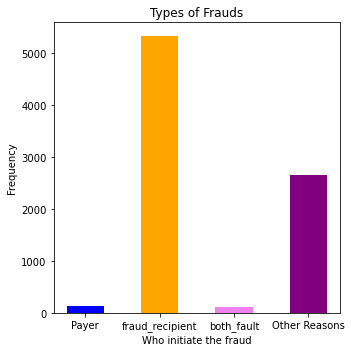

In [135]:
classes = ["Payer","fraud_recipient","both_fault","Other Reasons"]
values_1 = [costumer_who_started_transaction.shape[0],fraud_recipient.shape[0],both_fault.shape[0]]
# val = some other reasons
val = (frauds.shape[0] - sum(values_1))
values_1.append(val)

fig = plt.figure(figsize = (5,5))
plt.bar(classes,values_1, color =["blue","orange","violet","purple"], 
        width = 0.5)
 
plt.xlabel("Who initiate the fraud")
plt.ylabel("Frequency")
plt.title("Types of Frauds")
plt.tight_layout()
plt.show()

## Acurracy

### Calculating the accuracy of in build fraud Detector

In [40]:
frauds.head(n=10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,20128.00,0.0,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,0.00,0.0,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,1277212.77,0.0,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,1277212.77,0.0,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,35063.63,0.0,0.0,0.00,1,0


In [41]:
def accuracy_fn(y_true,y_pred,total_len):
    """It is a accuracy function which takes Y Label , Total length and Y Predtion as input"""
    acc = (sum(y_pred == y_true)/total_len)*100
    return acc

In [42]:
total_len = frauds.shape[0]
y_true = np.array(frauds["isFraud"])
y_pred = np.array(frauds["isFlaggedFraud"])
accuracy_fn(y_true,y_pred,total_len)

0.1948131011810544

### Acuraccy of Existing System is 0.1948131011810544 %

## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_fun(y_true,y_pred):
    #Using sklearn confusion matix function
    conf_matrix = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['predicted_0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

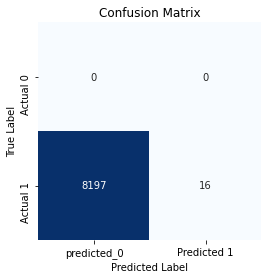

In [45]:
confusion_matrix_fun(y_true,y_pred)

### Accuracy confusion matrix over all dataset

In [46]:
y_true_for_full_data = np.array(fraud_data_new["isFraud"])
y_pred_for_full_data = np.array(fraud_data_new["isFlaggedFraud"])
total_length = fraud_data_new.shape[0]

Acurracy of existing Fraud Detector among entire dataset : 99.87116942391656


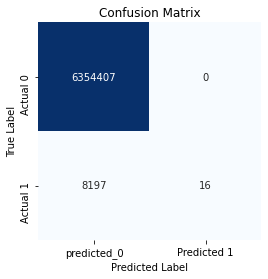

In [47]:
accuracy = accuracy_fn(y_true_for_full_data,y_pred_for_full_data,total_length)

print(f"Acurracy of existing Fraud Detector among entire dataset : {accuracy}")

confusion_matrix_fun(y_true_for_full_data,y_pred_for_full_data)

* **It is clearly be Shown That our detector is marking almost every transaction as valid transaction.**

# Creating Machine Learning Model Of Getting More Accurate Fraud Predictor

## Data Preprocessing

In [48]:
fraud_data_new.head(n=10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


### Feature selection

In [49]:
new_data = fraud_data_new.iloc[:,1:8]

In [50]:
new_data.head(n=10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [51]:
new_data.isna().value_counts()
# So there is no Nan values in Our data

type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud
False  False   False          False           False           False           False      6362620
Name: count, dtype: int64

###  Encoding Categorical Data

**Using OneHot encoding**

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [53]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[0])],remainder = "passthrough")

In [54]:
X = ct.fit_transform(new_data)

In [55]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,1.0,0.0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,181.00,181.0,0.00,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,181.00,181.0,0.00,21182.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [56]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.84888400e+04, 6.37989811e+06, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.51009911e+06, 7.36010163e+06, 1.00000000e+00]])

## Creating a Sample Data for Intial Exploration.
### We'll Take 25% of data.

In [57]:
# Quite large data sample
t_data = pd.DataFrame(X)
t_data.shape

(6362620, 11)

In [58]:
fraction_data= t_data.sample(frac = 0.25,random_state=1)

fraction_data.shape

(1590655, 11)

In [59]:
fraction_data.head()

,0,1,2,3,4,5,6,7,8,9,10
6322570,1.0,0.0,0.0,0.0,0.0,23557.12,8059.00,31616.12,169508.66,145951.53,0.0
3621196,0.0,0.0,0.0,1.0,0.0,6236.13,0.00,0.00,0.00,0.00,0.0
1226256,0.0,0.0,0.0,1.0,0.0,33981.87,18745.72,0.00,0.00,0.00,0.0
2803274,0.0,1.0,0.0,0.0,0.0,263006.42,20072.00,0.00,390253.56,653259.98,0.0
3201247,0.0,1.0,0.0,0.0,0.0,152013.74,20765.00,0.00,252719.19,404732.93,0.0


**Creating x,y**

In [60]:
x = fraction_data.iloc[:,:-1]
y = fraction_data.iloc[:,-1]

### Creating Training and Test Datasets

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 1,shuffle= True)

In [63]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9
2858944,0.0,1.0,0.0,0.0,0.0,26481.59,0.0,0.0,408904.15,435385.74
5314620,0.0,0.0,0.0,0.0,1.0,2098389.34,0.0,0.0,14679569.28,16777958.62
3640859,0.0,0.0,0.0,1.0,0.0,12530.25,0.0,0.0,0.00,0.00
353920,0.0,0.0,0.0,1.0,0.0,9696.39,0.0,0.0,0.00,0.00
3478354,0.0,0.0,0.0,0.0,1.0,179006.68,0.0,0.0,609635.20,788641.88


### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.iloc[:,5:] = sc.fit_transform(x_train.iloc[:,5:])
x_test.iloc[:,5:] = sc.fit_transform(x_test.iloc[:,5:])

<ipython-input-64-515f9f77b2b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:,5:] = sc.fit_transform(x_train.iloc[:,5:])
<ipython-input-64-515f9f77b2b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.iloc[:,5:] = sc.fit_transform(x_test.iloc[:,5:])


In [65]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9
2858944,0.0,1.0,0.0,0.0,0.0,-0.256753,-0.288817,-0.292531,-0.203768,-0.215375
5314620,0.0,0.0,0.0,0.0,1.0,3.206119,-0.288817,-0.292531,3.992432,4.234334
3640859,0.0,0.0,0.0,1.0,0.0,-0.280071,-0.288817,-0.292531,-0.324004,-0.333920
353920,0.0,0.0,0.0,1.0,0.0,-0.284807,-0.288817,-0.292531,-0.324004,-0.333920
3478354,0.0,0.0,0.0,0.0,1.0,-0.001831,-0.288817,-0.292531,-0.144745,-0.119191


In [66]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9
2577983,1.0,0.0,0.0,0.0,0.0,-0.287832,-0.283036,-0.284045,-0.319053,-0.332101
1702852,0.0,0.0,0.0,1.0,0.0,-0.272005,-0.290019,-0.294222,-0.328544,-0.338571
1036433,0.0,1.0,0.0,0.0,0.0,-0.146459,-0.283764,-0.294222,1.205553,1.109532
1222871,0.0,1.0,0.0,0.0,0.0,0.418511,-0.286752,-0.294222,-0.103981,-0.011995
4755450,0.0,1.0,0.0,0.0,0.0,0.059818,-0.286533,-0.294222,-0.328544,-0.279142


In [69]:
# convert them into numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



# ML MODELS 

## K-Nearest neighbour (KNN)
**KNN -** K-Nearest Neighbors (KNN) is a versatile algorithm used for classification and regression tasks. It assigns a new data point a label or value based on the majority class or average of k-nearest neighbors in the feature space. The algorithm relies on distance metrics, such as Euclidean distance, to determine proximity. The choice of the parameter k influences the model's bias-variance trade-off, with smaller values capturing more local patterns and larger values smoothing the predictions.
* For more info :- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
import os
n_jobs = os.cpu_count()
n_jobs

12

In [71]:
classifier = KNeighborsClassifier(n_neighbors=5,p = 2,metric='minkowski', metric_params=None, n_jobs= n_jobs)

In [72]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=12)

**Predicting on test dataset**

In [73]:
knn_y_pred = classifier.predict(x_test)

In [74]:
length = len(knn_y_pred)
accuracy_fn(y_test,knn_y_pred,length)

99.93336078533686

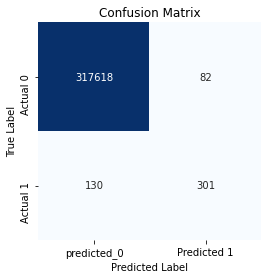

In [75]:
confusion_matrix_fun(y_test,knn_y_pred)

#### As we can see using Knn fraud detector we are chatching more number of frauds tha our original fraud detector

#### KNN visualization (Baad mai time mila tho)

## Support Vector Machine (SVM)
**SVM -** Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It aims to find a hyperplane that maximally separates data points of different classes in the feature space. SVM can handle linear and non-linear relationships by using different kernel functions. The optimal hyperplane is chosen based on the support vectors, which are data points closest to the decision boundary. SVM is effective in high-dimensional spaces, resistant to overfitting, and works well for both binary and multiclass classification problems. The regularization parameter (C) influences the trade-off between achieving a smooth decision boundary and classifying training points correctly. SVM is sensitive to scaling, and preprocessing data is crucial for optimal performance.

* For more info. :- https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

In [99]:
from sklearn.svm import SVC

In [100]:
svm_classifier = SVC(kernel='linear',random_state=0)

In [101]:
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [102]:
svm_y_pred = svm_classifier.predict(x_test)

#### Calculating Accuracy and Confusion Matrix

In [105]:
length = len(svm_y_pred)

In [106]:
accuracy_fn(y_test,svm_y_pred,length)

99.89941250616884

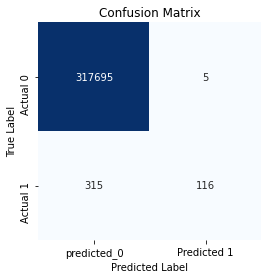

In [107]:
confusion_matrix_fun(y_test,svm_y_pred)

## Logistic Regression
**LogisticRegression -** Logistic Regression is a binary classification algorithm that predicts the probability of an instance belonging to a specific class. It uses the logistic function to transform the output into a range between 0 and 1. The model interprets the output as the likelihood of the positive class. The decision boundary is determined by a threshold, typically 0.5. Parameters are learned through maximum likelihood estimation during training. Logistic Regression is simple, interpretable, and effective for linear relationships between features and the log-odds of the output. It has applications in diverse fields due to its versatility.
* for more info :- https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
lg_classifier = LogisticRegression( n_jobs= n_jobs)

In [120]:
lg_classifier.fit(x_train,y_train)

LogisticRegression(n_jobs=12)

In [121]:
lg_y_pred = lg_classifier.predict(x_test)

#### Calculating Accuracy and Confusion Matrix

In [122]:
accuracy_fn(y_test,svm_y_pred,length)

99.89941250616884

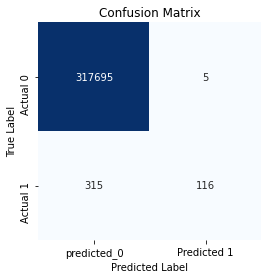

In [123]:
confusion_matrix_fun(y_test,svm_y_pred)

## Random Forest
**Random Forest -** Random Forest is an ensemble machine learning algorithm used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to improve accuracy and robustness. Each tree is trained on a subset of the data, and random subsets of features are considered at each split. The final prediction is determined by averaging (for regression) or voting (for classification) across the individual trees. Random Forest is known for its high performance, resistance to overfitting, and suitability for complex datasets with many features.
* for more info. :- https://towardsdatascience.com/random-forest-classification-678e551462f5


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy',random_state=0, n_jobs= n_jobs)

In [125]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=12,
                       random_state=0)

In [126]:
rf_y_pred = rf_classifier.predict(x_test)

#### Calculating Accuracy and Confusion matrix

In [127]:
length_rf = len(rf_y_pred)
accuracy_fn(y_test,rf_y_pred,length_rf)

99.92141602044441

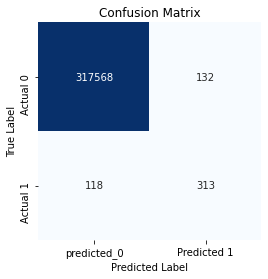

In [128]:
confusion_matrix_fun(y_test,rf_y_pred)

# Training model on Entire Dataset
## We'll use *Random Forest algorithm* as they shows most promissing results.

In [83]:
t_data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,1.0,0.0,9839.64,170136.00,160296.36,0.0,0.00,0.0
1,0.0,0.0,0.0,1.0,0.0,1864.28,21249.00,19384.72,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,1.0,181.00,181.00,0.00,0.0,0.00,1.0
3,0.0,1.0,0.0,0.0,0.0,181.00,181.00,0.00,21182.0,0.00,1.0
4,0.0,0.0,0.0,1.0,0.0,11668.14,41554.00,29885.86,0.0,0.00,0.0
5,0.0,0.0,0.0,1.0,0.0,7817.71,53860.00,46042.29,0.0,0.00,0.0
6,0.0,0.0,0.0,1.0,0.0,7107.77,183195.00,176087.23,0.0,0.00,0.0
7,0.0,0.0,0.0,1.0,0.0,7861.64,176087.23,168225.59,0.0,0.00,0.0
8,0.0,0.0,0.0,1.0,0.0,4024.36,2671.00,0.00,0.0,0.00,0.0
9,0.0,0.0,1.0,0.0,0.0,5337.77,41720.00,36382.23,41898.0,40348.79,0.0


In [84]:
x_all = t_data.iloc[:,:-1]
y_all = t_data.iloc[:,-1]

In [85]:
x_all.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,9839.64,170136.0,160296.36,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1864.28,21249.0,19384.72,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,181.00,181.0,0.00,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,181.00,181.0,0.00,21182.0,0.0
4,0.0,0.0,0.0,1.0,0.0,11668.14,41554.0,29885.86,0.0,0.0


In [86]:
x_all.shape

(6362620, 10)

### Creating Training and Test Datasets

In [87]:
x_all_train,x_all_test,y_all_train,y_all_test = train_test_split(x_all,y_all,test_size= 0.2,random_state= 1,shuffle= True)

In [88]:
x_all_train.head()

,0,1,2,3,4,5,6,7,8,9
2276631,0.0,0.0,0.0,1.0,0.0,1607.27,0.00,0.00,0.00,0.00
1580855,0.0,0.0,0.0,1.0,0.0,16958.15,416.00,0.00,0.00,0.00
1080958,0.0,1.0,0.0,0.0,0.0,249226.07,11335.00,0.00,0.00,155927.95
4557677,1.0,0.0,0.0,0.0,0.0,217722.54,4383327.55,4601050.10,3507554.23,3289831.69
3092419,1.0,0.0,0.0,0.0,0.0,34150.62,5735503.44,5769654.06,228360.12,194209.50


### Feature Scaling

In [89]:
x_all_train.iloc[:,5:] = sc.fit_transform(x_all_train.iloc[:,5:])
x_all_test.iloc[:,5:] = sc.fit_transform(x_all_test.iloc[:,5:])

<ipython-input-89-4f925177c747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_all_train.iloc[:,5:] = sc.fit_transform(x_all_train.iloc[:,5:])
<ipython-input-89-4f925177c747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_all_test.iloc[:,5:] = sc.fit_transform(x_all_test.iloc[:,5:])


In [90]:
x_all_train.head()

,0,1,2,3,4,5,6,7,8,9
2276631,0.0,0.0,0.0,1.0,0.0,-0.294472,-0.288640,-0.292359,-0.324045,-0.333521
1580855,0.0,0.0,0.0,1.0,0.0,-0.269117,-0.288496,-0.292359,-0.324045,-0.333521
1080958,0.0,1.0,0.0,0.0,0.0,0.114513,-0.284716,-0.292359,-0.324045,-0.291079
4557677,1.0,0.0,0.0,0.0,0.0,0.062480,1.229113,1.281290,0.708309,0.561936
3092419,1.0,0.0,0.0,0.0,0.0,-0.240721,1.697312,1.680975,-0.256834,-0.280659


In [91]:
#Converting all to numpy array
x_all_train = np.array(x_all_train)
x_all_test = np.array(x_all_test)
y_all_train = np.array(y_all_train)
y_all_test = np.array(y_all_test)


## Random Forest for entire dataset

In [129]:
rf_classifier.fit(x_all_train,y_all_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=12,
                       random_state=0)

In [130]:
rf_y_all_pred = rf_classifier.predict(x_all_test)

#### Calculating Confusion matrix and Accuracy.

In [131]:
length_all = len(rf_y_all_pred)
length_all

1272524

In [132]:
round(accuracy_fn(y_all_test,rf_y_all_pred,length_all),2)

99.76

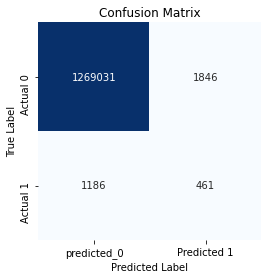

In [133]:
confusion_matrix_fun(y_all_test,rf_y_all_pred)

# Summary

### Distribution of Classes:
* The majority of transactions are normal (non-fraudulent), indicating a class imbalance.
* The percentage of fraud transactions is notably low, emphasizing the rarity of fraudulent activities.

### Cashflow Analysis:
* The analysis reveals that the largest sum of money flows through Transfer and Cash-out transactions.
* Cash-ins and Payments follow, with significantly lower amounts involved.
  Debit transactions have the least monetary flow.
  
### Amount Transfer Range:
* Fraud analysis indicates that fraudulent transactions often occur within a lower total amount transfer range.
* Understanding this pattern can aid in setting thresholds for anomaly detection and enhancing fraud prevention measures.

### Transaction Types Involved in Frauds:
* Only two transaction types, Transfer (4116 instances) and Cash-out (4097 instances), are associated with fraud.
* Both types occur with similar frequencies, suggesting a potential pattern in fraudulent activities related to these transaction types.

### Recipient Analysis in Frauds:

* Examining fraud occurrences reveals whether fraud tends to occur more frequently on the recipient side.
* It investigates whether recipients receive less or more money than expected, shedding light on potential patterns in fraudulent activities.

### Accuracy of Existing Fraud Detector:

* The existing fraud detection model exhibits low accuracy, as it tends to classify nearly every transaction as valid.
* The model's performance raises concerns about its effectiveness in distinguishing between fraudulent and legitimate transactions.

### Performance of ML Models:

* Out of four ML models evaluated, Random Forest demonstrates the highest accuracy.
* On the sample dataset, Random Forest achieves an accuracy of 99.93%, while on the entire dataset, it maintains a high accuracy of 99.76%.
* The superior performance of Random Forest suggests its effectiveness in accurately classifying transactions in this context.














# Solutions

### Fragmented Database for Enhanced Surveillance:

* To implement targeted surveillance, the database must be divided into several fragments.

* It is these lower amount transactions that need to be prioritized with strong surveillance measures.

* This strategy aims to enhance the speed and effectiveness of fraud detection for low-value transactions by focusing resources where the risk is higher.

### Specialized Model Training for Fraud Detection:

* In view of this, it may be necessary to train the model on only two types of transactions which are involved in fraud consistently throughout.

* Specializing the model for these specific types can potentially improve accuracy and expedite fraud detection, as the model becomes finely tuned to recognize patterns relevant to fraudulent activity in those transaction categories.

### Surveillance Focused on Transfers and Cash-Outs:

* Given that transfers and cash-outs form a significant proportion of most transactions, priority should be laid on specialized surveillance measures targeting such transactions.

* This targeted approach allows for concentrated monitoring where the transaction volume is high, optimizing resources for enhanced fraud detection in these critical transaction types.

### Fragmented Database with Specialized Fraud Detection:

* Divide the database into fragments based on transaction characteristics, concentrating on specific subsets with unique patterns.
* Build specialized fraud detectors for each fragment, tailoring models to the distinctive features within those subsets.
* This approach aims to increase accuracy and accelerate fraud detection by customizing models to the nuances of different fragments, optimizing performance for specific transaction profiles.